In [12]:
#Global AI Hub International Machine Learning Bootcamp Project
#Data set is retrieved from www.kaggle.com/datasets/mirichoi0218/insurance

##Initialization, import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
insurance_data=pd.read_csv("../input/insurance/insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

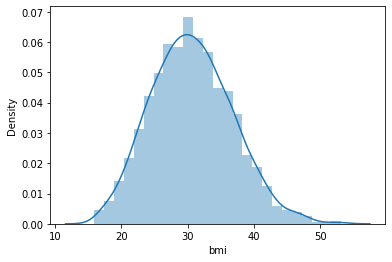

In [14]:
#Distribution of Body Mass Index
sns.distplot(insurance_data["bmi"])

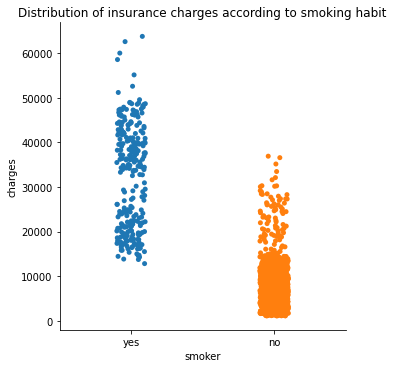

In [15]:
#Visualization of relation ship between smoking and insurance charge
sns.catplot(data=insurance_data, x="smoker", y="charges").set(title = "Distribution of insurance charges according to smoking habit")

<AxesSubplot:xlabel='region', ylabel='count'>

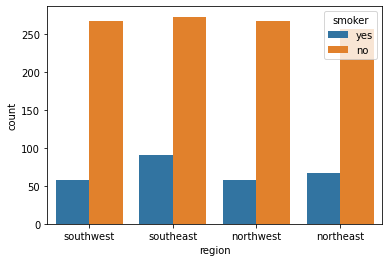

In [16]:
#To see what the region names are
#print(insurance_data["region"].unique())

#To see distribution of smokers and non-smokers in regions  individually
sns.countplot(data=insurance_data,x="region",hue="smoker")

<AxesSubplot:xlabel='smoker', ylabel='count'>

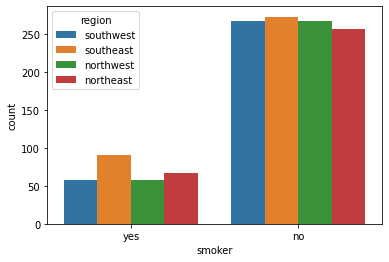

In [17]:
#To see the distribution of smokers and non-smokers for regions
sns.countplot(data=insurance_data,x="smoker",hue="region")

<AxesSubplot:xlabel='sex', ylabel='bmi'>

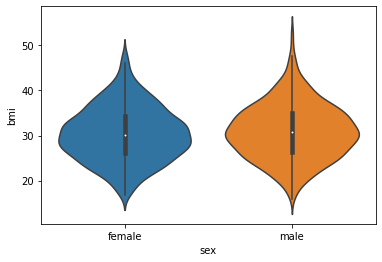

In [18]:
#Visualization of BMI and sex relation
sns.violinplot(data=insurance_data,y="bmi",x="sex")

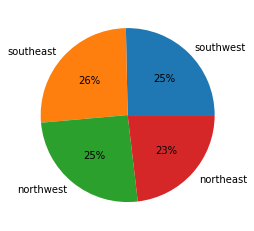

In [19]:
#To see children distribution along regions
regions = pd.unique(insurance_data["region"])
children = []

for region in regions:
    region_filtered =insurance_data.loc[((insurance_data["region"] == region))]
    children.append(region_filtered["children"].sum())
    
plt.pie(children, labels = regions,autopct='%.0f%%')
plt.show()

It is visible that the region has most children is Southeast part.

<AxesSubplot:xlabel='age', ylabel='bmi'>

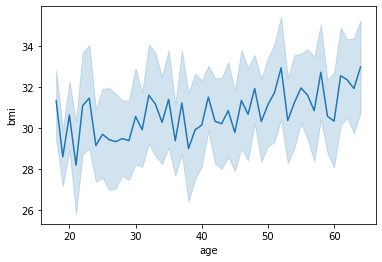

In [20]:
#Graph of bmi distribution with respect to age
sns.lineplot(data=insurance_data,y="bmi",x="age")

As you can see, the average bmi index is slightly increasing while age is going higher. 

<AxesSubplot:xlabel='children', ylabel='bmi'>

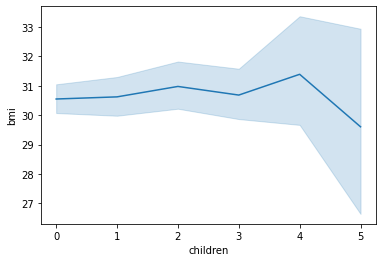

In [21]:
sns.lineplot(x ='children', y ='bmi', data = insurance_data)

There is no clear relationship between children and bmi index. Average bmi index suddenly drop after 4 children. This is because of lack of input for 5 children.

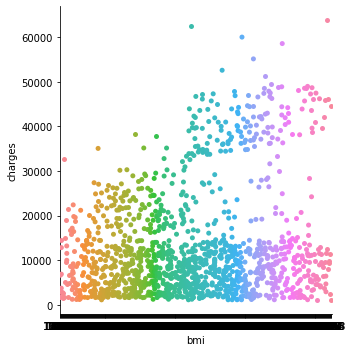

In [22]:
sns.catplot(x ='bmi', y ='charges', data = insurance_data)

While bmi index is going higher, charges start to increase.

<AxesSubplot:xlabel='region', ylabel='bmi'>

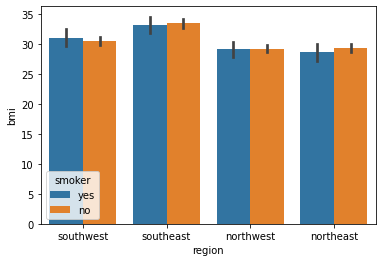

In [23]:
sns.barplot(data=insurance_data,y="bmi",x="region",hue="smoker")

There is no significant bmi value difference between smokers and non-smokers for all regions. Bmi value at Souheast is higher than the other regions.

In [24]:
#Data preparation
#With Label Encoding to smoker category
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
insurance_data["smoker_N"] = labelencoder.fit_transform(insurance_data["smoker"]) 
#With One-Hot Encoding technique to apply region category
insurance_data = pd.get_dummies(insurance_data, columns=["region"], prefix="region")
insurance_data.head()

,age,sex,bmi,children,smoker,charges,smoker_N,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,1,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,0,1,0,0


In [25]:
#Create X and Y dataframes
X = insurance_data[["age","bmi","smoker_N","region_northeast","region_northwest","region_southeast","region_southwest"]]
Y = insurance_data[["charges"]]

#Normalize X and Y dataframes using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model=scaler.fit(X)
scaled_Xdata = pd.DataFrame(model.transform(X),columns=["age","bmi","smoker_N","region_northeast","region_northwest","region_southeast","region_southwest"])
model = scaler.fit(Y)
scaled_Ydata = pd.DataFrame(model.transform(Y),columns=["charges"])

#Using train test split from sklearn, prepare train and test data sets
from sklearn.model_selection import train_test_split, KFold
X_train,X_test,y_train,y_test = train_test_split(scaled_Xdata,scaled_Ydata,test_size=0.25,random_state=5)

print("Train data length = ",len(X_train),", Test data length = ",len(X_test))

Train data length =  1003 , Test data length =  335


In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred_linear = regressor.predict(X_test)
from sklearn.model_selection import KFold,cross_validate
kf = KFold(n_splits=5)
precision = cross_validate(regressor, scaled_Xdata, scaled_Ydata, cv=kf)
print(precision)

{'fit_time': array([0.00403309, 0.00345039, 0.00364804, 0.00336194, 0.00338125]), 'score_time': array([0.00281405, 0.00281906, 0.00270963, 0.00271153, 0.00267601]), 'test_score': array([0.7628934 , 0.70345183, 0.77564314, 0.7294756 , 0.75262729])}


In [27]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
precision = cross_validate(ridge, scaled_Xdata, scaled_Ydata, cv=kf)
print(precision)

{'fit_time': array([0.00445318, 0.00339627, 0.00325274, 0.00338602, 0.00327659]), 'score_time': array([0.0027585 , 0.00263071, 0.00270271, 0.00261354, 0.00261378]), 'test_score': array([0.76244937, 0.7078249 , 0.77396803, 0.7296476 , 0.75214027])}


In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)
precision = cross_validate(lasso, scaled_Xdata, scaled_Ydata, cv=kf)
print(precision)

{'fit_time': array([0.00390005, 0.0033257 , 0.00324821, 0.00333333, 0.00322247]), 'score_time': array([0.0027113 , 0.00270987, 0.00300384, 0.00265217, 0.00263214]), 'test_score': array([0.6836566 , 0.65665242, 0.67911943, 0.66273787, 0.68521307])}
